                                                          References - (1) Lectures by Prof. Ramkumar Hariharan,
                                                             (2) Introduction to Machine Learning with Python by 
                                                                              Andreas C. Müller and Sarah Guido,
                                                              (3) Library documentations - Numpy, Scipy, Seaborn

# Logistic Regression Unit / Single Neuron Neural Network

### I. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

---

### II. Importing the dataset and getting some insights of the dataset

In [2]:
df = pd.read_csv('diabetes.csv') #Please change the path if the dataset is not in the same folder.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Generate descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Compute pairwise correlation of columns, excluding NA/null values
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

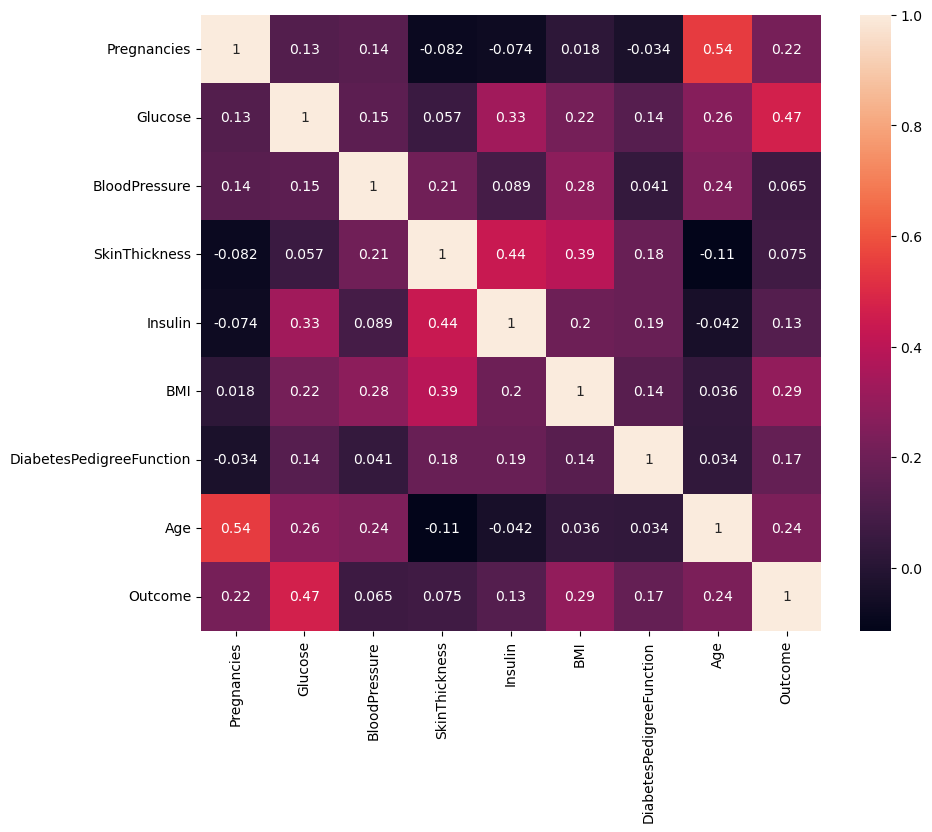

In [6]:
#Plot the correlation heatmap using seaborn
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [7]:
#Checking for null values
df. isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Checking for duplicate values
len(df)-len(df.drop_duplicates())

0

<AxesSubplot:xlabel='Outcome', ylabel='count'>

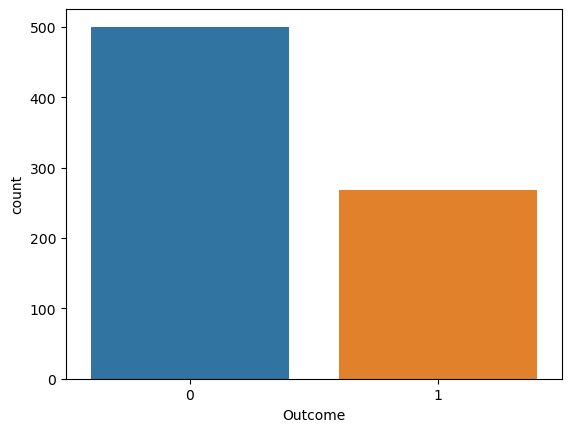

In [9]:
#Comparing the outcome strength
sns.countplot(x=df.Outcome)

We can observe that the dataset has more Outcomes as 0 than 1. This however may not affect the models as we are going to use SGD for optimization.

We can plot the boxplots of all the columns to check how normalized is our features of the dataset.

/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<AxesSubplot:xlabel='Age'>

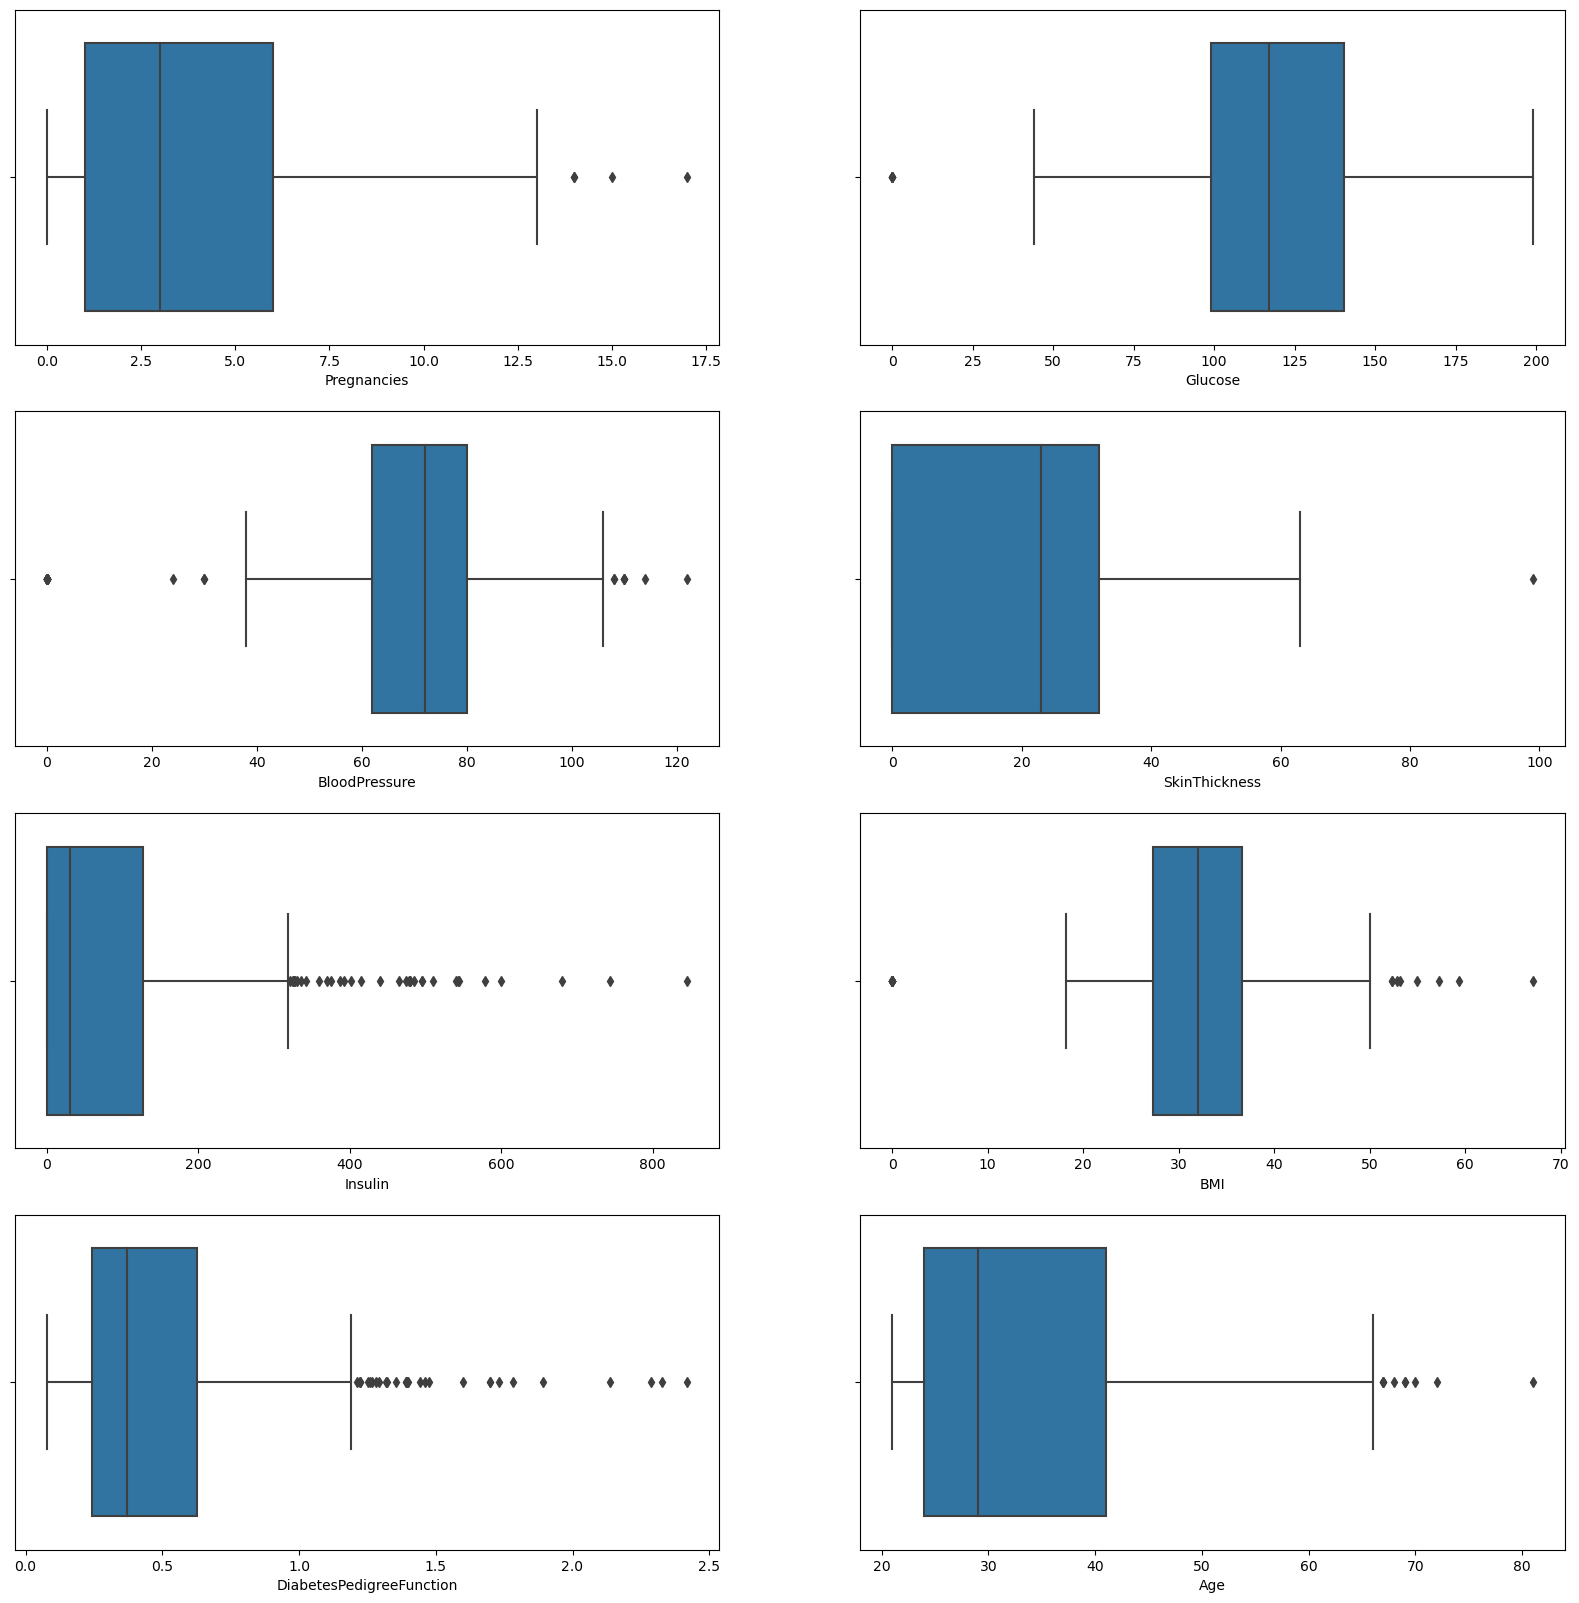

In [11]:
#Plot boxplot of our dataset
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.boxplot(df.Pregnancies, ax=axes[0,0])
sns.boxplot(df.Glucose, ax=axes[0,1])
sns.boxplot(df.BloodPressure, ax=axes[1,0])
sns.boxplot(df.SkinThickness, ax=axes[1,1])
sns.boxplot(df.Insulin, ax=axes[2,0])
sns.boxplot(df.BMI, ax=axes[2,1])
sns.boxplot(df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.boxplot(df.Age, ax=axes[3,1])

We can clearly observe that the features can be normalized more to obtain better results.

To normalize the dataset we can use the z-score normalization method.

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

Another good way to do this can be boxcox transformation.

However, we won't apply normalization before splitting our features into train-validate-test sets. The reason behind this is we want the normalization to be based on its own set of split rather than the whole data.

---

### III. Splitting the dataset into Train, Validation & Test 

In [12]:
# Split the dataset into train, validation, and test sets
np.random.seed(42)
shuffled_indices = np.random.permutation(len(df))
train_indices = shuffled_indices[:int(0.6*len(df))]
val_indices = shuffled_indices[int(0.6*len(df)):int(0.8*len(df))]
test_indices = shuffled_indices[int(0.8*len(df)):]

X = df.iloc[:-1].values
y = df.iloc[-1].values

#Simultaneously splitting the dataset and also normalizing the X values
X_train = stats.zscore(df.iloc[train_indices, :-1].values)
y_train = df.iloc[train_indices, -1].values
X_val = stats.zscore(df.iloc[val_indices, :-1].values)
y_val = df.iloc[val_indices, -1].values
X_test = stats.zscore(df.iloc[test_indices, :-1].values)
y_test = df.iloc[test_indices, -1].values

---

### IV. The Logistic Regression Unit 

Now, we make a class for Logistic Regression and write down all the required functions.

We can assume that the default batch size of 1 since we are going to update the weights after processing each sample of the training set. Hence the number of epochs will be equal to our number of iterations.

### A. Logistic Regression Unit using Sigmoid Function

Here, we are going to use the Sigmoid Function as our activation function. We can either directly use the formula or we can use the "expit" function from scipy.special which is the actual function for sigmoid in scipy library.

In order to prevent exploding and vanishing gradient problem and to achieve global minima an automated learning rate methodology is required i.e. keras and pytorch methodologies. But given the requirements, I have considered a learning rate of 0.1 and number of iterations as 1000.

In [13]:
class LogisticRegression1:
    #Predefine the learning rate to 0.1 and the number of iterations to 1000
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    #Using sigmoid function as our activation function for the neuron 
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # 1/(1+e^-z)
    
    #Define a function for calculating log loss
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15 #using epsilon to avoid taking log of zero
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #limiting the values of y_pred to avoid NaN values
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))#logloss(a,y)=-yloga-(1-y)log(1-a)
    
    #Function for input data to be fed through the neural network, in a forward direction, to generate an output
    def forward_propagation(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.y_pred = self.sigmoid(self.z)
    
    #Function to correct the weights after comparing the prediction to the true output
    def backward_propagation(self, X, y_true):
        dw = np.dot(X.T, (self.y_pred - y_true)) / y_true.size
        db = np.sum(self.y_pred - y_true) / y_true.size
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    #Function to fit the train values, perform SGD for given number of iterations and calculate the training costs
    def fit(self, X, y):
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perform stochastic gradient descent
        costs = []
        for i in range(self.n_iter):
            # Forward propagation
            self.forward_propagation(X)
            cost = self.log_loss(y, self.y_pred)
            costs.append(cost)
            
            # Backward propagation
            self.backward_propagation(X, y)
        
        return costs
    
    #Function to predict the output of given validation/test set
    def predict(self, X):
        self.forward_propagation(X)
        y_pred_class = np.round(self.y_pred).astype(int) #Rounding of the value to 0 or 1 as the Outcomes are binary
        return y_pred_class

In [14]:
# Train the logistic regression model
lr1 = LogisticRegression1(learning_rate=0.1, n_iter=1000)
costs_train1 = lr1.fit(X_train, y_train)

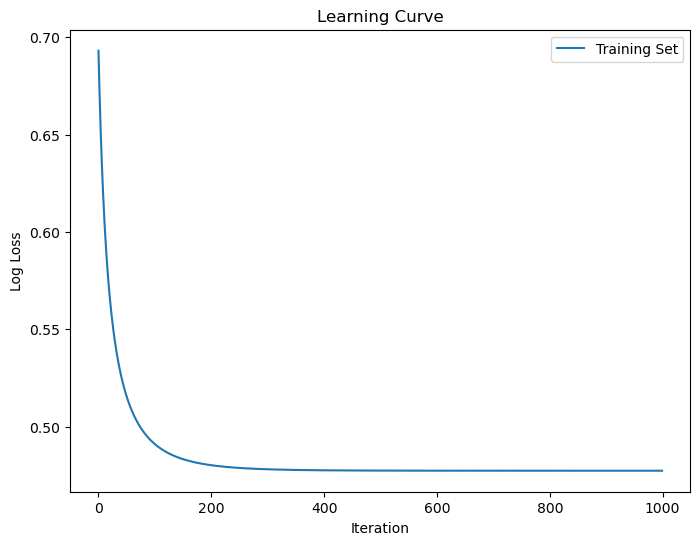

In [15]:
# Plot the learning curve using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(costs_train1, label="Training Set")
ax.set_xlabel("Iteration")
ax.set_ylabel("Log Loss")
ax.set_title("Learning Curve")
ax.legend()
plt.show()

By this plot we can clearly observe that the log loss is constant after around 300 iterations. We can further go on to calculate the accuracy and validation log loss for both validation and test set.

In [16]:
# Calculate the accuracy and log loss on the validation set
y_pred_val1 = lr1.predict(X_val)
accuracy_val1 = (y_pred_val1 == y_val).mean()
cost_val1 = lr1.log_loss(y_val, lr1.y_pred)

In [17]:
#Print the Validation accuracy and Validation log loss
print(f"Validation Accuracy: {accuracy_val1:.4f}")
print(f"Validation Log Loss: {cost_val1:.4f}")

Validation Accuracy: 0.7922
Validation Log Loss: 0.4455


In [18]:
# Calculate the accuracy and log loss on the test set
y_pred_test1 = lr1.predict(X_test)
accuracy_test1 = (y_pred_test1 == y_test).mean()
cost_test1 = lr1.log_loss(y_test, lr1.y_pred)

In [19]:
#Print the Test accuracy and Test log loss
print(f"Test Accuracy: {accuracy_test1:.4f}")
print(f"Test Log Loss: {cost_test1:.4f}")

Test Accuracy: 0.7338
Test Log Loss: 0.4954


Another way to calculate the accuracy and also the F-1 score is using the sklearn library directly.

In [20]:
from sklearn.metrics import accuracy_score, f1_score


# Calculate accuracy of validation set
accuracy_val1 = accuracy_score(y_val, y_pred_val1)
print('Accuracy:', accuracy_val1)

# Calculate F1-score of validation set
f1_val1 = f1_score(y_val, y_pred_val1)
print('F1-score:', f1_val1)

Accuracy: 0.7922077922077922
F1-score: 0.6595744680851064


In [21]:
# Calculate accuracy of test set
accuracy_test1 = accuracy_score(y_test, y_pred_test1)
print('Accuracy:', accuracy_test1)

# Calculate F1-score of test set
f1_test1 = f1_score(y_test, y_pred_test1)
print('F1-score:', f1_test1)

Accuracy: 0.7337662337662337
F1-score: 0.5858585858585859


We will use this further to compare it with our other results for different activation functions.

### B. Logistic Regression Unit using ReLu Function

Here, we are going to use the ReLu(Rectified Linear Unit) Activation Function.

In [22]:
class LogisticRegression2:
    #Predefine the learning rate to 0.1 and the number of iterations to 1000
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    #Using relu function as our activation function for the neuron 
    def relu(self, z):
        return np.maximum(0, z)# Replacing all negative values with zero
    
    #Define a function for calculating log loss
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15 #using epsilon to avoid taking log of zero
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #limiting the values of y_pred to avoid NaN values
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))#logloss(a,y)=-yloga-(1-y)log(1-a)
    
    #Function for input data to be fed through the neural network, in a forward direction, to generate an output
    def forward_propagation(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.y_pred = self.relu(self.z)
    
    #Function to correct the weights after comparing the prediction to the true output
    def backward_propagation(self, X, y_true):
        dw = np.dot(X.T, (self.y_pred - y_true)) / y_true.size
        db = np.sum(self.y_pred - y_true) / y_true.size
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    #Function to fit the train values, perform SGD for given number of iterations and calculate the training costs
    def fit(self, X, y):
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perform stochastic gradient descent
        costs = []
        for i in range(self.n_iter):
            # Forward propagation
            self.forward_propagation(X)
            cost = self.log_loss(y, self.y_pred)
            costs.append(cost)
            
            # Backward propagation
            self.backward_propagation(X, y)
        
        return costs
    
    #Function to predict the output of given validation/test set
    def predict(self, X):
        self.forward_propagation(X)
        y_pred_class = np.round(self.y_pred).astype(int) #Rounding of the value to 0 or 1 as the Outcomes are binary
        return y_pred_class

In [23]:
# Train the logistic regression model
lr2 = LogisticRegression2(learning_rate=0.1, n_iter=1000)
costs_train2 = lr2.fit(X_train, y_train)

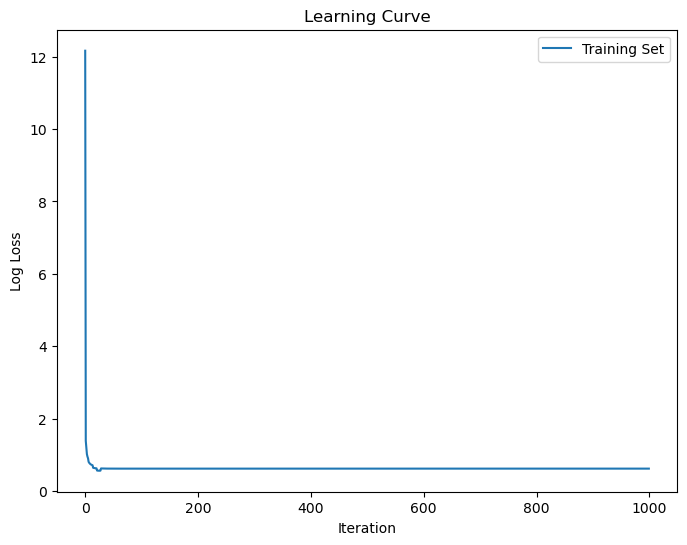

In [24]:
# Plot the learning curve using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(costs_train2, label="Training Set")
ax.set_xlabel("Iteration")
ax.set_ylabel("Log Loss")
ax.set_title("Learning Curve")
ax.legend()
plt.show()

We can observe the decrease in log loss after just 10 iterations.

In [25]:
# Calculate the accuracy and log loss on the validation set
y_pred_val2 = lr2.predict(X_val)
accuracy_val2 = (y_pred_val2 == y_val).mean()
cost_val2 = lr2.log_loss(y_val, lr2.y_pred)

In [26]:
#Print the Validation accuracy and Validation log loss
print(f"Validation Accuracy: {accuracy_val2:.4f}")
print(f"Validation Log Loss: {cost_val2:.4f}")

Validation Accuracy: 0.7857
Validation Log Loss: 0.6414


In [27]:
# Calculate the accuracy and log loss on the test set
y_pred_test2 = lr2.predict(X_test)
accuracy_test2 = (y_pred_test2 == y_test).mean()
cost_test2 = lr2.log_loss(y_test, lr2.y_pred)

In [28]:
#Print the Test accuracy and Test log loss
print(f"Test Accuracy: {accuracy_test2:.4f}")
print(f"Test Log Loss: {cost_test2:.4f}")

Test Accuracy: 0.7403
Test Log Loss: 0.6825


Using sklearn,

In [29]:
# Calculate accuracy of validation set
accuracy_val2 = accuracy_score(y_val, y_pred_val2)
print('Accuracy:', accuracy_val2)

# Calculate F1-score of validation set
f1_val2 = f1_score(y_val, y_pred_val2)
print('F1-score:', f1_val2)

Accuracy: 0.7857142857142857
F1-score: 0.6373626373626373


In [30]:
# Calculate accuracy of test set
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
print('Accuracy:', accuracy_test2)

# Calculate F1-score of test set
f1_test2 = f1_score(y_test, y_pred_test2)
print('F1-score:', f1_test2)

Accuracy: 0.7402597402597403
F1-score: 0.5918367346938775


### C. Logistic Regression Unit using TanH function

Our final activation function would be TanH(Hyperbolic Tangent) Activation Function.

In [31]:
class LogisticRegression3:
    #Predefine the learning rate to 0.1 and the number of iterations to 1000
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    #Using tanh function as our activation function for the neuron 
    def tanh(self, z):
        return np.tanh(z)#Using the tanh function which is equivalent to (e^z - e^-z)/(e^z - e^-z)
    
    #Define a function for calculating log loss
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15 #using epsilon to avoid taking log of zero
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #limiting the values of y_pred to avoid NaN values
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))#logloss(a,y)=-yloga-(1-y)log(1-a)
    
    #Function for input data to be fed through the neural network, in a forward direction, to generate an output
    def forward_propagation(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.y_pred = self.tanh(self.z)
    
    #Function to correct the weights after comparing the predeiction to the true output
    def backward_propagation(self, X, y_true):
        dw = np.dot(X.T, (self.y_pred - y_true)) / y_true.size
        db = np.sum(self.y_pred - y_true) / y_true.size
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    #Function to fit the train values, perform SGD for given number of iterations and calculate the training costs
    def fit(self, X, y):
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perform stochastic gradient descent
        costs = []
        for i in range(self.n_iter):
            # Forward propagation
            self.forward_propagation(X)
            cost = self.log_loss(y, self.y_pred)
            costs.append(cost)
            
            # Backward propagation
            self.backward_propagation(X, y)
        
        return costs
    
    #Function to predict the output of given validation/test set
    def predict(self, X):
        self.forward_propagation(X)
        y_pred_class = np.round(self.y_pred).astype(int) #Rounding of the value to 0 or 1 as the Outcomes are binary
        return y_pred_class

In [32]:
# Train the logistic regression model
lr3 = LogisticRegression3(learning_rate=0.1, n_iter=1000)
costs_train3 = lr3.fit(X_train, y_train)

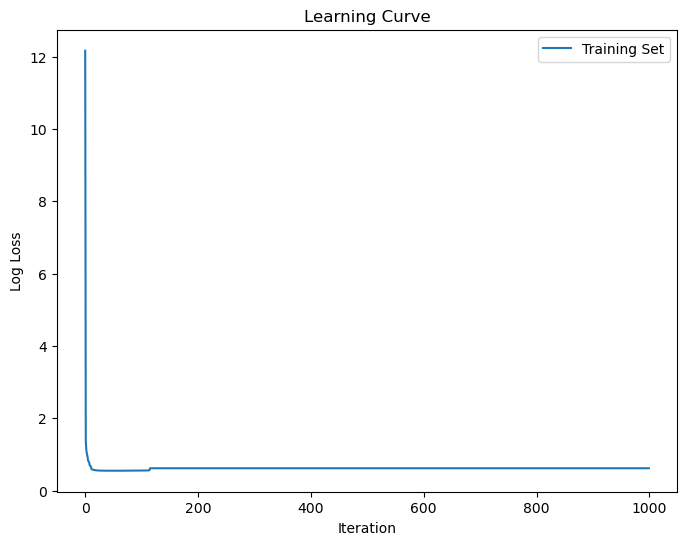

In [33]:
# Plot the learning curve using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(costs_train3, label="Training Set")
ax.set_xlabel("Iteration")
ax.set_ylabel("Log Loss")
ax.set_title("Learning Curve")
ax.legend()
plt.show()

In [34]:
# Calculate the accuracy and log loss on the validation set
y_pred_val3 = lr3.predict(X_val)
accuracy_val3 = (y_pred_val3 == y_val).mean()
cost_val3 = lr3.log_loss(y_val, lr3.y_pred)

In [35]:
#Print the Validation accuracy and Validation log loss
print(f"Validation Accuracy: {accuracy_val3:.4f}")
print(f"Validation Log Loss: {cost_val3:.4f}")

Validation Accuracy: 0.8117
Validation Log Loss: 0.4474


In [36]:
# Calculate the accuracy and log loss on the test set
y_pred_test3 = lr3.predict(X_test)
accuracy_test3 = (y_pred_test3 == y_test).mean()
cost_test3 = lr3.log_loss(y_test, lr3.y_pred)

In [37]:
#Print the Test accuracy and Test log loss
print(f"Test Accuracy: {accuracy_test3:.4f}")
print(f"Test Log Loss: {cost_test3:.4f}")

Test Accuracy: 0.7208
Test Log Loss: 0.6969


In [38]:
# Calculate accuracy of validation set
accuracy_val3 = accuracy_score(y_val, y_pred_val3)
print('Accuracy:', accuracy_val3)

# Calculate F1-score of validation set
f1_val3 = f1_score(y_val, y_pred_val3)
print('F1-score:', f1_val3)

Accuracy: 0.8116883116883117
F1-score: 0.7010309278350516


In [39]:
# Calculate accuracy of test set
accuracy_test3 = accuracy_score(y_test, y_pred_test3)
print('Accuracy:', accuracy_test3)

# Calculate F1-score of test set
f1_test3 = f1_score(y_test, y_pred_test3)
print('F1-score:', f1_test3)

Accuracy: 0.7207792207792207
F1-score: 0.5825242718446603


---

### V. Comparing the Accuracy and F-1 Scores

Now, we can compare the accuracy and F-1 scores we have obtained from our three models. We will plot the f-1 scores for both the validation set and the test set.

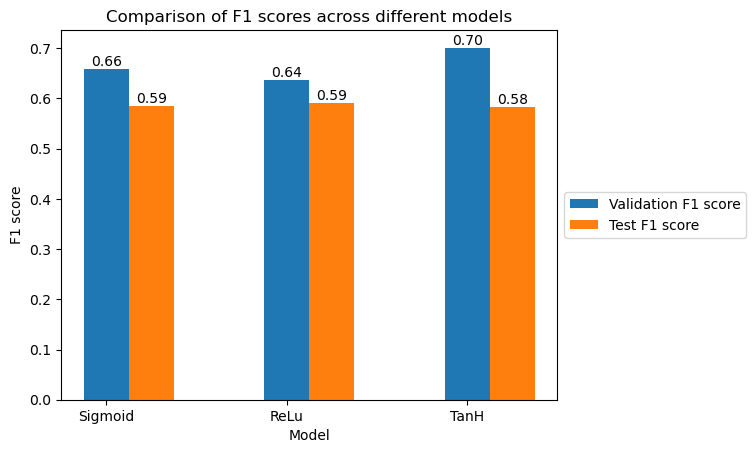

In [40]:
# Create a plot of f1 scores for the three models
labels = ['Sigmoid', 'ReLu', 'TanH']
val_f1_scores = [f1_val1, f1_val2, f1_val3]
test_f1_scores = [f1_test1, f1_test2, f1_test3]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x, val_f1_scores, width, label='Validation F1 score')
rects2 = ax.bar(x + width, test_f1_scores, width, label='Test F1 score')

# Add text above each bar displaying the f1 score
for rect1, rect2 in zip(rects1, rects2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.text(rect1.get_x() + rect1.get_width() / 2, height1, f'{height1:.2f}',
            ha='center', va='bottom')
    ax.text(rect2.get_x() + rect2.get_width() / 2, height2, f'{height2:.2f}',
            ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('F1 score')
ax.set_title('Comparison of F1 scores across different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Now, we will plot the accuracy for both validation and test sets of our three models.

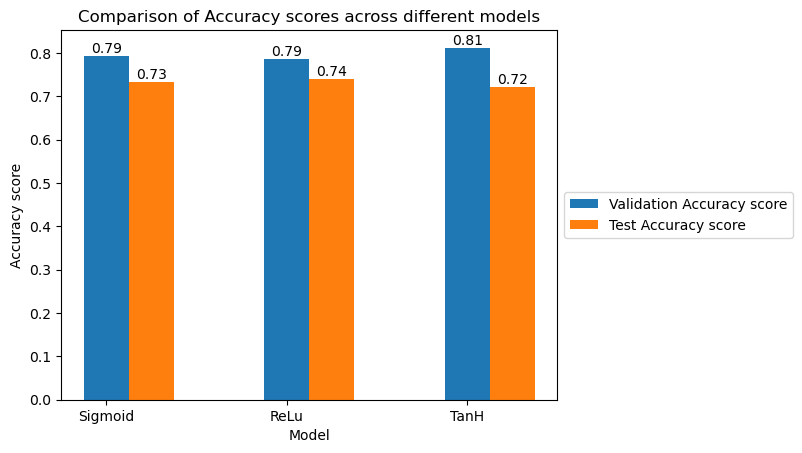

In [41]:
# Create a plot of accuracy scores for the three models
labels = ['Sigmoid', 'ReLu', 'TanH']
val_acc_scores = [accuracy_val1, accuracy_val2, accuracy_val3]
test_acc_scores = [accuracy_test1, accuracy_test2, accuracy_test3]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x, val_acc_scores, width, label='Validation Accuracy score')
rects2 = ax.bar(x + width, test_acc_scores, width, label='Test Accuracy score')

# Add text above each bar displaying the f1 score
for rect1, rect2 in zip(rects1, rects2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.text(rect1.get_x() + rect1.get_width() / 2, height1, f'{height1:.2f}',
            ha='center', va='bottom')
    ax.text(rect2.get_x() + rect2.get_width() / 2, height2, f'{height2:.2f}',
            ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy score')
ax.set_title('Comparison of Accuracy scores across different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

From the above plots it can be observed that our third model(with TanH activation function) has better validation F-1 score and accuracy, however, the other two models perform better on the test set and can be considered as slightly better than the third one.

======================================================END=============================================================